In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Read in tuitiontracker.org data 

In [19]:
tuition_tracker = pd.read_csv("../data/tuition_tracker_all-schools.csv")
tuition_tracker.head(25)

,UnitID,Institution Name,State abbreviation (HD2017),Sector of institution (HD2017),Degree-granting status (HD2017),Degree of urbanization (Urban-centric locale) (HD2017),Percent paying sticker price,Institution (entity) name (HD2017),Institution name alias (HD2017),City location of institution (HD2017),...,Students from the part-time adjusted fall 2014 cohort enrolled in fall 2015 (EF2015D_RV),Part-time adjusted fall 2014 cohort (EF2015D_RV),Students from the full-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV),Full-time adjusted fall 2013 cohort (EF2014D_RV),Students from the part-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV),Part-time adjusted fall 2013 cohort (EF2014D_RV),Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV),Full-time adjusted fall 2012 cohort (EF2013D_RV),Students from the part-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV),Part-time adjusted fall 2012 cohort (EF2013D_RV)
0,491394.0,Edge Tech Academy,TX,9.0,2.0,21.0,NaN,Edge Tech Academy,NaN,Hurst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,491303.0,University of Wisconsin Colleges Flex,WI,4.0,1.0,11.0,NaN,University of Wisconsin Colleges Flex,NaN,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,491297.0,University of Wisconsin-Parkside Flex,WI,1.0,2.0,22.0,100.0,University of Wisconsin-Parkside Flex,NaN,Kenosha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,491288.0,University of Wisconsin-Milwaukee Flex,WI,1.0,1.0,11.0,100.0,University of Wisconsin-Milwaukee Flex,NaN,Milwaukee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,491242.0,Johnny Matthew's Hairdressing Training School,OR,9.0,2.0,12.0,NaN,Johnny Matthew's Hairdressing Training School,NaN,Salem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,491233.0,Unlimited Cosmetology School,MS,9.0,2.0,13.0,NaN,Unlimited Cosmetology School,NaN,Hattiesburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,491190.0,The Chicago School of Professional Psychology ...,CA,2.0,1.0,11.0,100.0,The Chicago School of Professional Psychology ...,NaN,San Diego,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,491181.0,Galen College of Nursing-ARH,KY,6.0,1.0,33.0,NaN,Galen College of Nursing-ARH,NaN,Hazard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,491163.0,Advanced College-Stockton,CA,6.0,1.0,11.0,NaN,Advanced College-Stockton,NaN,Stockton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,491145.0,Empire Beauty School-Lakeland,FL,9.0,2.0,12.0,NaN,Empire Beauty School-Lakeland,NaN,Lakeland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some basic EDA...

In [3]:
tuition_tracker.shape

(6521, 406)

In [4]:
tuition_tracker.dtypes

UnitID                                                                                      float64
Institution Name                                                                             object
State abbreviation (HD2017)                                                                  object
Sector of institution (HD2017)                                                              float64
Degree-granting status (HD2017)                                                             float64
                                                                                             ...   
Part-time adjusted fall 2013 cohort (EF2014D_RV)                                            float64
Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)    float64
Full-time adjusted fall 2012 cohort (EF2013D_RV)                                            float64
Students from the part-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)    float64


In [5]:
tuition_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6521 entries, 0 to 6520
Columns: 406 entries, UnitID to Part-time adjusted fall 2012 cohort (EF2013D_RV)
dtypes: float64(398), object(8)
memory usage: 20.2+ MB


In [15]:
print(tuition_tracker.columns)

Index(['UnitID', 'Institution Name', 'State abbreviation (HD2017)',
       'Sector of institution (HD2017)', 'Degree-granting status (HD2017)',
       'Degree of urbanization (Urban-centric locale) (HD2017)',
       'Percent paying sticker price', 'Institution (entity) name (HD2017)',
       'Institution name alias (HD2017)',
       'City location of institution (HD2017)',
       ...
       'Students from the part-time adjusted fall 2014 cohort enrolled in fall 2015 (EF2015D_RV)',
       'Part-time adjusted fall 2014 cohort (EF2015D_RV)',
       'Students from the full-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV)',
       'Full-time adjusted fall 2013 cohort (EF2014D_RV)',
       'Students from the part-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV)',
       'Part-time adjusted fall 2013 cohort (EF2014D_RV)',
       'Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)',
       'Full-time adjusted fall 2012 coh

## How to handle large number of Nan values?

In [9]:
tuition_tracker.isna().sum()

UnitID                                                                                         1
Institution Name                                                                               1
State abbreviation (HD2017)                                                                    1
Sector of institution (HD2017)                                                                71
Degree-granting status (HD2017)                                                                1
                                                                                            ... 
Part-time adjusted fall 2013 cohort (EF2014D_RV)                                            3312
Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)    1398
Full-time adjusted fall 2012 cohort (EF2013D_RV)                                            1358
Students from the part-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)    3535
Part-time adjusted fall 2012 c

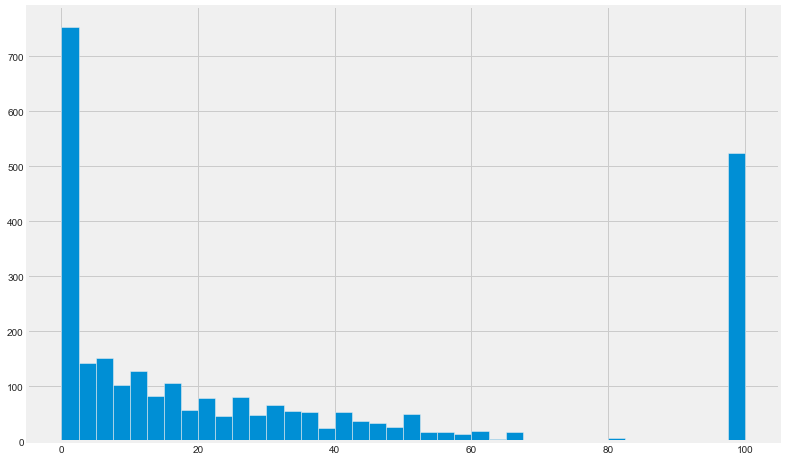

In [13]:
plt.figure(figsize=(12, 8))
tuition_tracker['Percent paying sticker price'].hist(bins=40)